In [17]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [24]:
# create mapping of image to captions

BASE_DIR = './'
WORKING_DIR = './'

with open(os.path.join(BASE_DIR, 'captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()
    
    
mapping = {}
# process lines
for line in tqdm(captions_doc.split('\n')):
    # split the line by comma(,)
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    # remove extension from image ID
    image_id = image_id.split('.')[0]
    # convert caption list to string
    caption = " ".join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(caption)

def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc.,
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption
clean(mapping)

all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)


# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1
vocab_size
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

  0%|          | 0/40456 [00:00<?, ?it/s]

35

In [25]:
from tensorflow.keras.models import load_model
model = load_model('./my_model.keras')

In [26]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
model2 = VGG16()
model2 = Model(inputs=model2.inputs, outputs=model2.layers[-2].output)
# print(model2.summary())


In [27]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# generate caption for an image
def predict_caption(model, image, tokenizer, max_length=35):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break

    return in_text

In [28]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption2(img_path):
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = model2.predict(image, verbose=0)
    image = Image.open(img_path)
    # predict the caption
    y_pred = predict_caption(model, feature, tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

--------------------Predicted--------------------
startseq man in red vest is riding an orange atv in field endseq


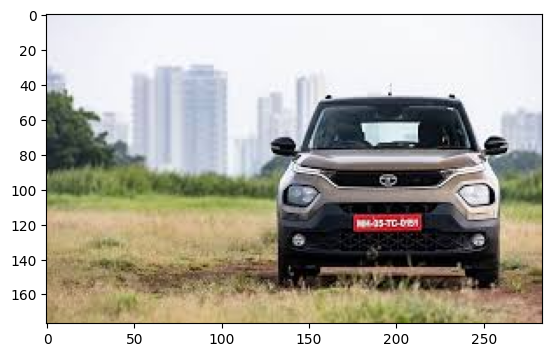

In [29]:
generate_caption2('./test/images (1).jpeg')

--------------------Predicted--------------------
startseq man in red jacket is standing in garden with flowers endseq


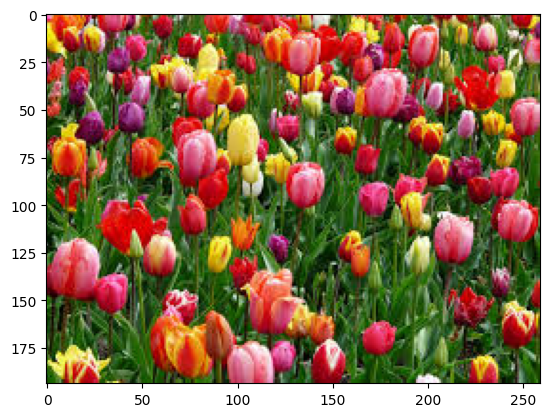

In [30]:
generate_caption2('./test/images (11).jpeg')


--------------------Predicted--------------------
startseq black and white dog is standing in the rain endseq


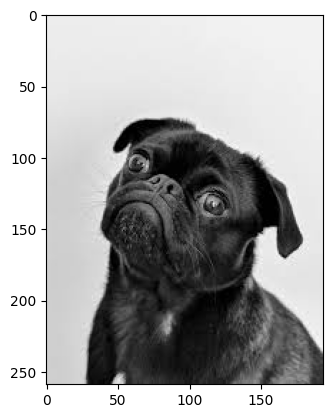

In [31]:
generate_caption2('./test/images (12).jpeg')


--------------------Predicted--------------------
startseq two young children are sitting on bench endseq


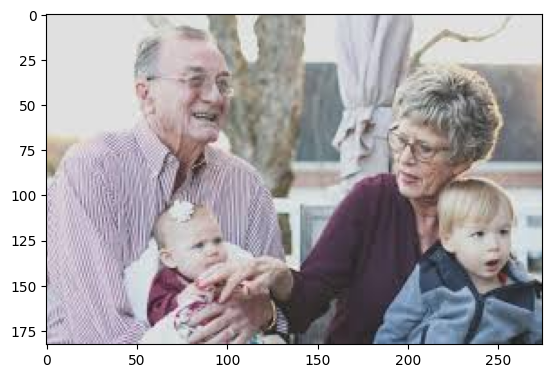

In [32]:
generate_caption2('./test/images (13).jpeg')


--------------------Predicted--------------------
startseq soccer dog is running along an orange slide endseq


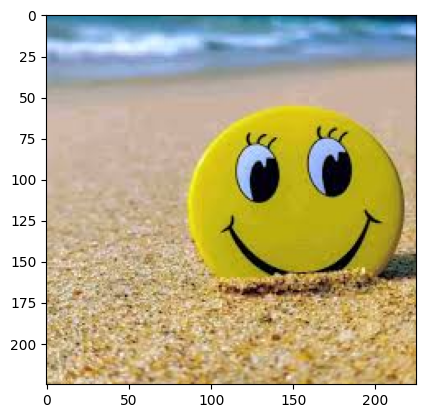

In [33]:
generate_caption2('./test/images (14).jpeg')


--------------------Predicted--------------------
startseq girl in red and black outfit is playing with her arms outstretched endseq


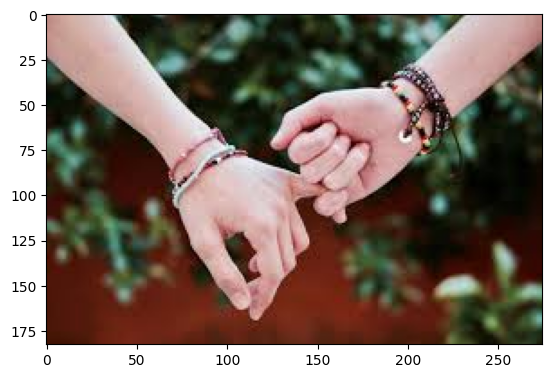

In [34]:
generate_caption2('./test/images (15).jpeg')


--------------------Predicted--------------------
startseq many people are gathered in an outdoor market with crowded cars and cars around the side endseq


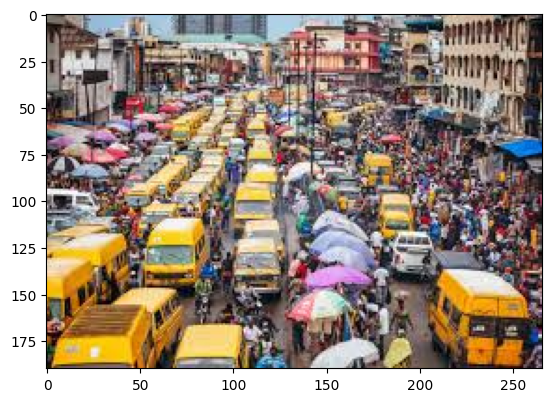

In [35]:
generate_caption2('./test/images (16).jpeg')


--------------------Predicted--------------------
startseq the person is standing in the water with the sun reflecting to the handle endseq


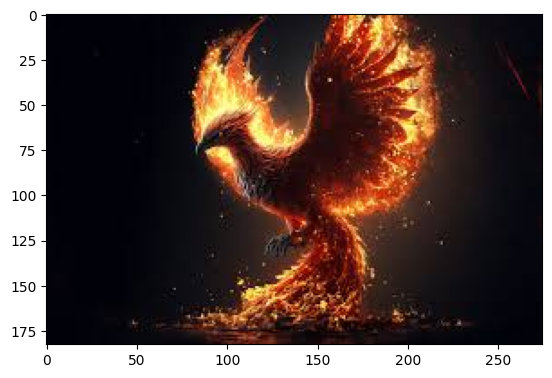

In [36]:
generate_caption2('./test/images (17).jpeg')


--------------------Predicted--------------------
startseq distant person stands in the middle of steep rock endseq


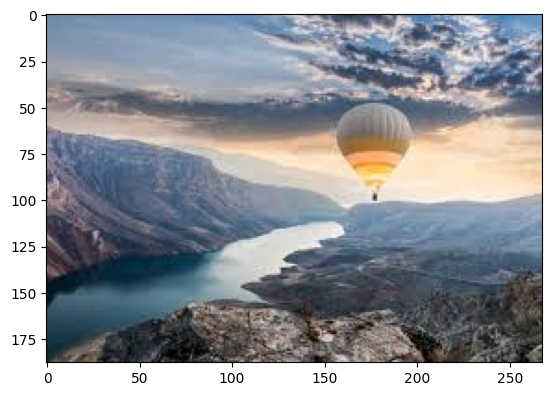

In [37]:
generate_caption2('./test/images (18).jpeg')


--------------------Predicted--------------------
startseq young girl examines red and red headband endseq


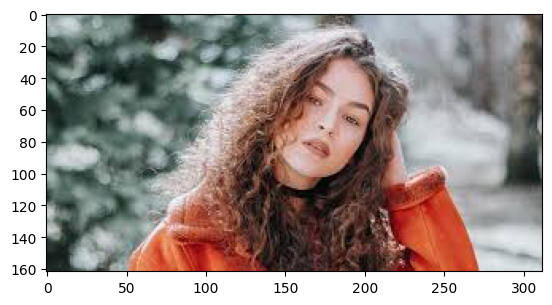

In [38]:
generate_caption2('./test/images (19).jpeg')


--------------------Predicted--------------------
startseq car is being driven by car in the rain endseq


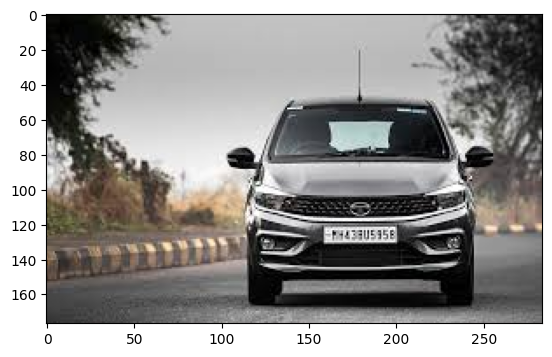

In [39]:
generate_caption2('./test/images (20).jpeg')


--------------------Predicted--------------------
startseq the man is tugging as it is eating beer endseq


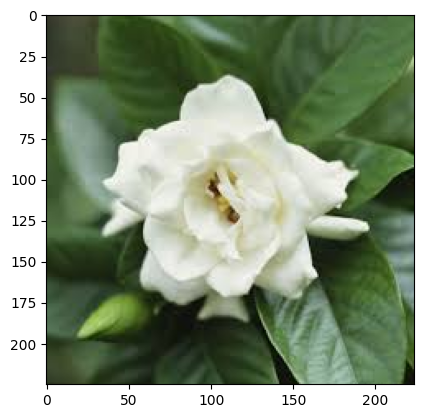

In [40]:
generate_caption2('./test/images (21).jpeg')


--------------------Predicted--------------------
startseq man in green shirt is sitting on top of rock endseq


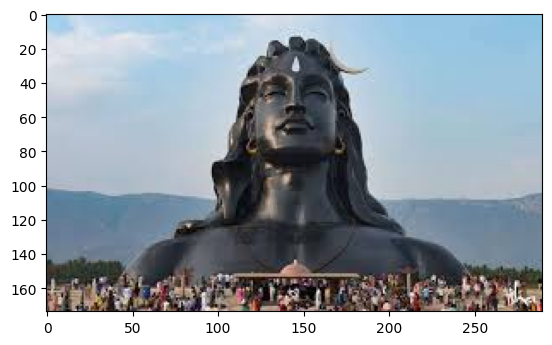

In [42]:
generate_caption2('./test/images (22).jpeg')


--------------------Predicted--------------------
startseq closeup photo of little girl eating beer endseq


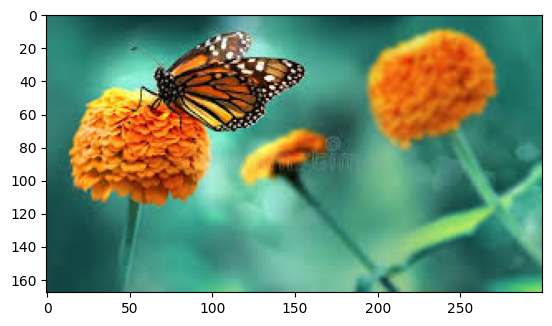

In [43]:
generate_caption2('./test/images (23).jpeg')


--------------------Predicted--------------------
startseq two children in red and black one in red dress fighting in the air endseq


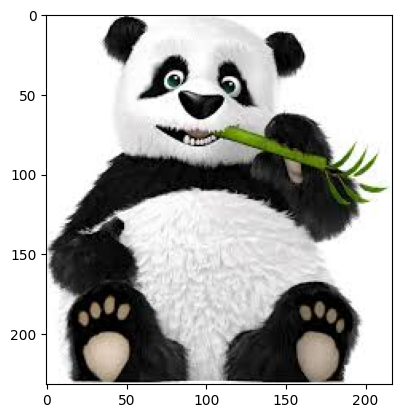

In [44]:
generate_caption2('./test/images (24).jpeg')


--------------------Predicted--------------------
startseq the woman is wearing blue sweater endseq


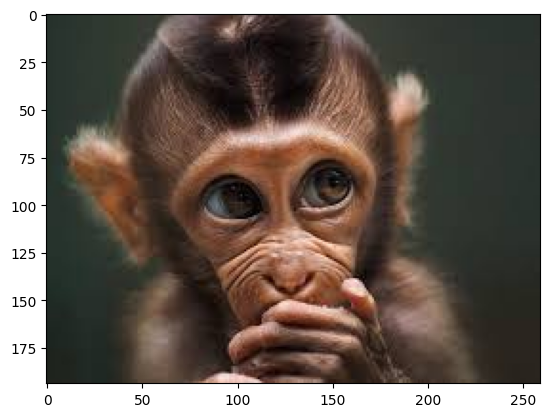

In [45]:
generate_caption2('./test/images (25).jpeg')


--------------------Predicted--------------------
startseq two small children playing on the street endseq


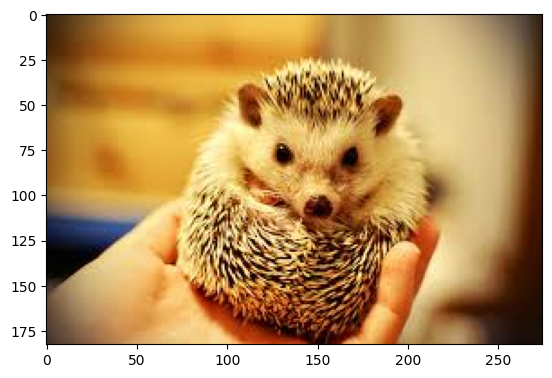

In [46]:
generate_caption2('./test/images (26).jpeg')


--------------------Predicted--------------------
startseq dog is running through the snow endseq


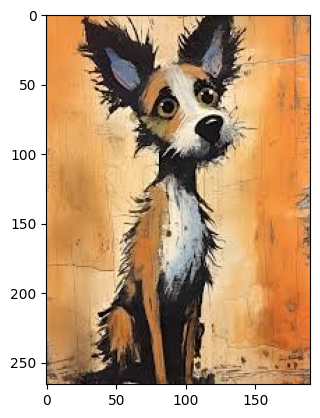

In [47]:
generate_caption2('./test/images (27).jpeg')


--------------------Predicted--------------------
startseq woman wearing glasses and glasses is smiling endseq


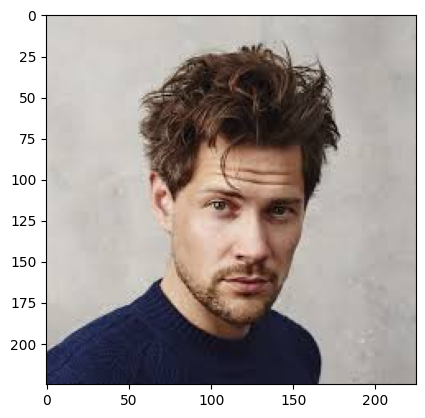

In [48]:
generate_caption2('./test/images (28).jpeg')


--------------------Predicted--------------------
startseq man wearing black hat and glasses looks into the camera endseq


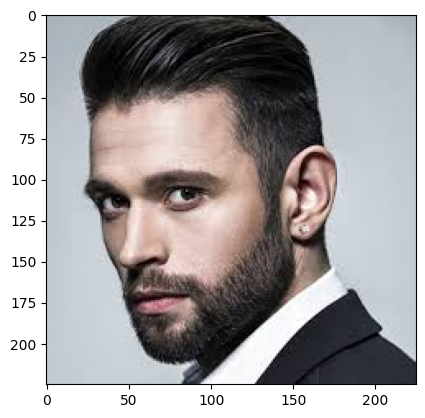

In [49]:
generate_caption2('./test/images (29).jpeg')


--------------------Predicted--------------------
startseq man wearing glasses and glasses is pulling fishing rod endseq


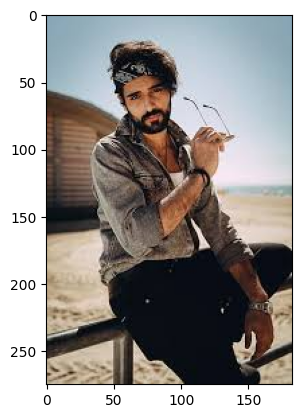

In [50]:
generate_caption2('./test/images (30).jpeg')


--------------------Predicted--------------------
startseq man in brown shirt and glasses is standing in front of some rock wall endseq


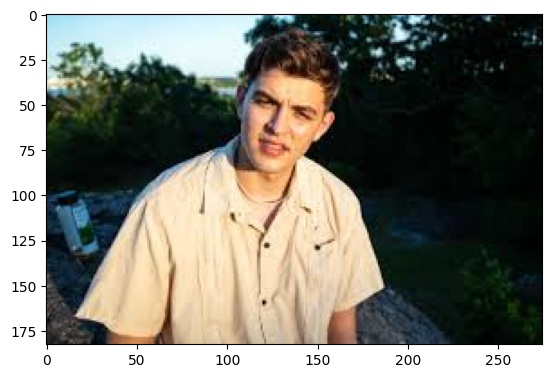

In [51]:
generate_caption2('./test/images (31).jpeg')


--------------------Predicted--------------------
startseq man in black sweater is smiling endseq


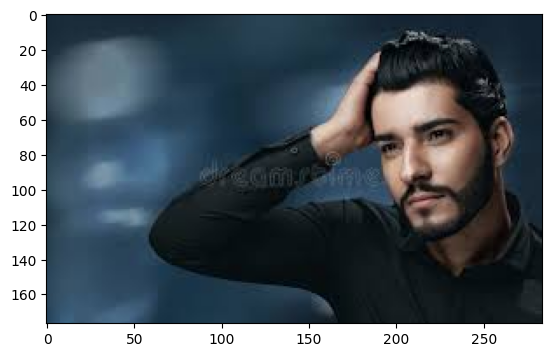

In [53]:
generate_caption2('./test/images (32).jpeg')


--------------------Predicted--------------------
startseq two women are standing in front of brick wall endseq


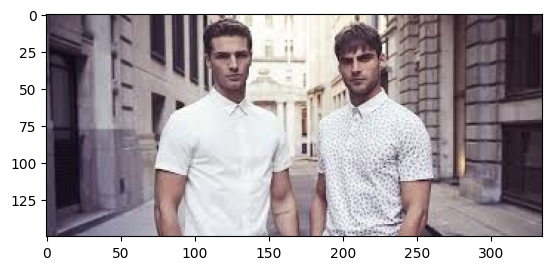

In [52]:
generate_caption2('./test/images (33).jpeg')


--------------------Predicted--------------------
startseq two young women are in line of huge flowers endseq


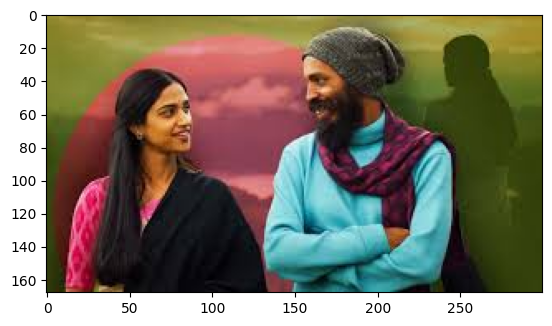

In [54]:
generate_caption2('./test/images (34).jpeg')


--------------------Predicted--------------------
startseq girl in pink dress is running through sprinkler endseq


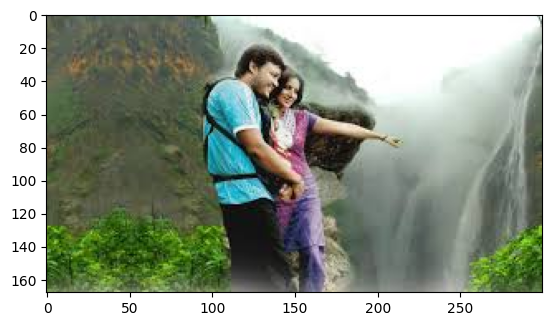

In [55]:
generate_caption2('./test/images (35).jpeg')


--------------------Predicted--------------------
startseq two teenage girls are wearing formal clothes endseq


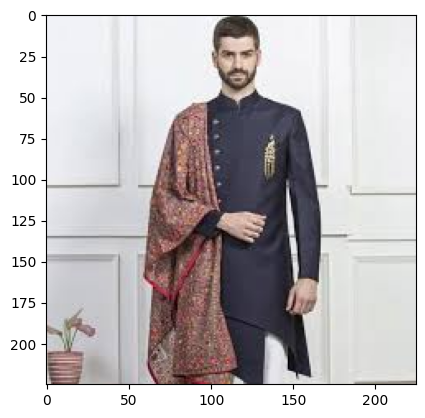

In [56]:
generate_caption2('./test/images (36).jpeg')


--------------------Predicted--------------------
startseq two children sparring with their arms outstretched endseq


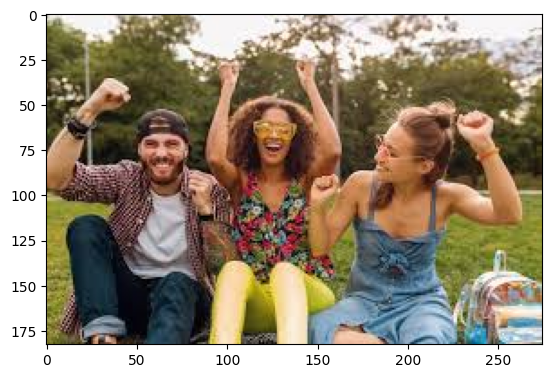

In [57]:
generate_caption2('./test/images (37).jpeg')


--------------------Predicted--------------------
startseq woman in black shirt and black boots is sitting on concrete wall with her trunk taken endseq


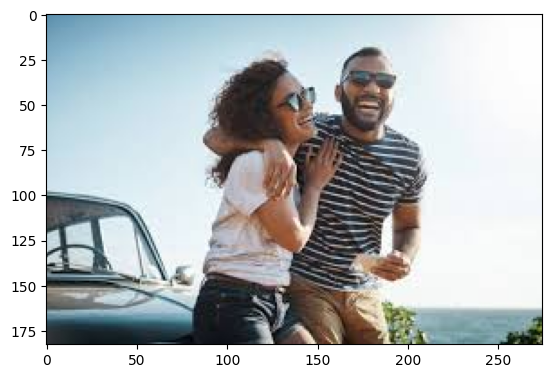

In [58]:
generate_caption2('./test/images (38).jpeg')


--------------------Predicted--------------------
startseq man with glasses and glasses with glasses endseq


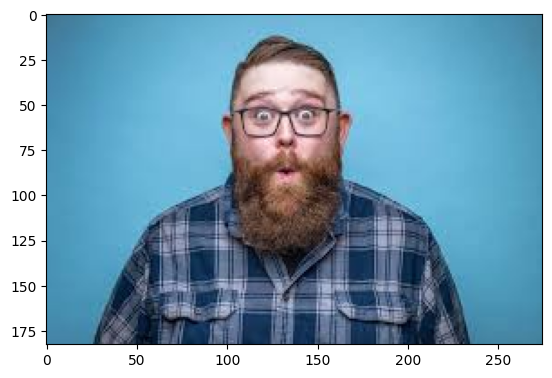

In [59]:
generate_caption2('./test/images (39).jpeg')


--------------------Predicted--------------------
startseq two kids are sitting on red car during an orange truck endseq


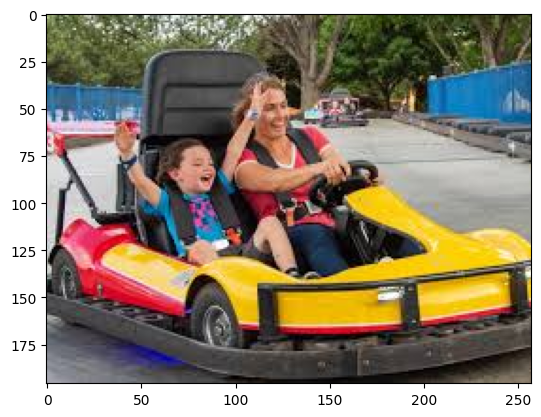

In [60]:
generate_caption2('./test/images (40).jpeg')


--------------------Predicted--------------------
startseq two people are sitting on dock overlooking lake endseq


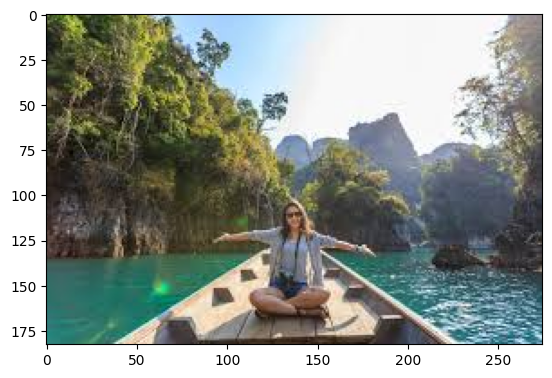

In [61]:
generate_caption2('./test/images (41).jpeg')


--------------------Predicted--------------------
startseq woman in field of field endseq


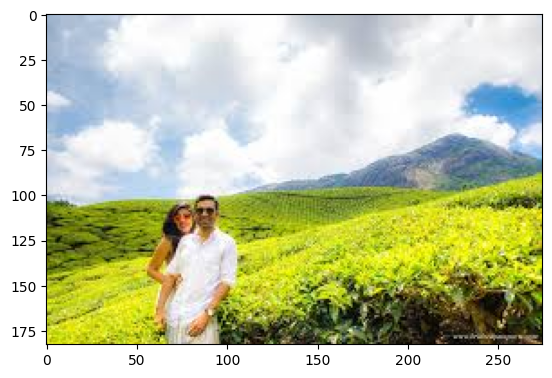

In [62]:
generate_caption2('./test/images (42).jpeg')


--------------------Predicted--------------------
startseq woman in red shorts and boots is walking on the beach endseq


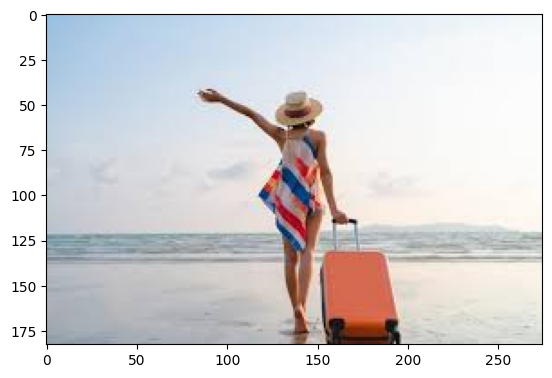

In [63]:
generate_caption2('./test/images (43).jpeg')
